## Waste Management Using CNN Model

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Importing neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path="Dataset\TRAIN"
test_path="Dataset\TEST"

In [5]:
#Importing libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model,plot_model
from glob import glob

In [6]:
#Visualization
from cv2 import cvtColor
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data,'label':y_data})  


100%|██████████| 9999/9999 [01:24<00:00, 118.69it/s]


In [7]:
data.shape

(22564, 2)

In [8]:
import plotly.io as pio
pio.renderers.default = "browser"  # Render in the browser instead of Jupyter

import plotly.graph_objects as go

# Example data
sizes = [60, 40]  # Example values for Organic and Recyclable
labels = ['Organic', 'Recyclable']
colors = ['#663399', '#FFC0CB']

# Create a Plotly 3D pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=sizes, 
    textinfo='label+percent', 
    pull=[0.1, 0],  # Exploding the first slice
    marker=dict(colors=colors)
)])

fig.update_traces(hole=0.3)  # Add a donut effect if desired
fig.update_layout(title_text="Distribution of Plastic Waste Categories (3D)")
fig.show()







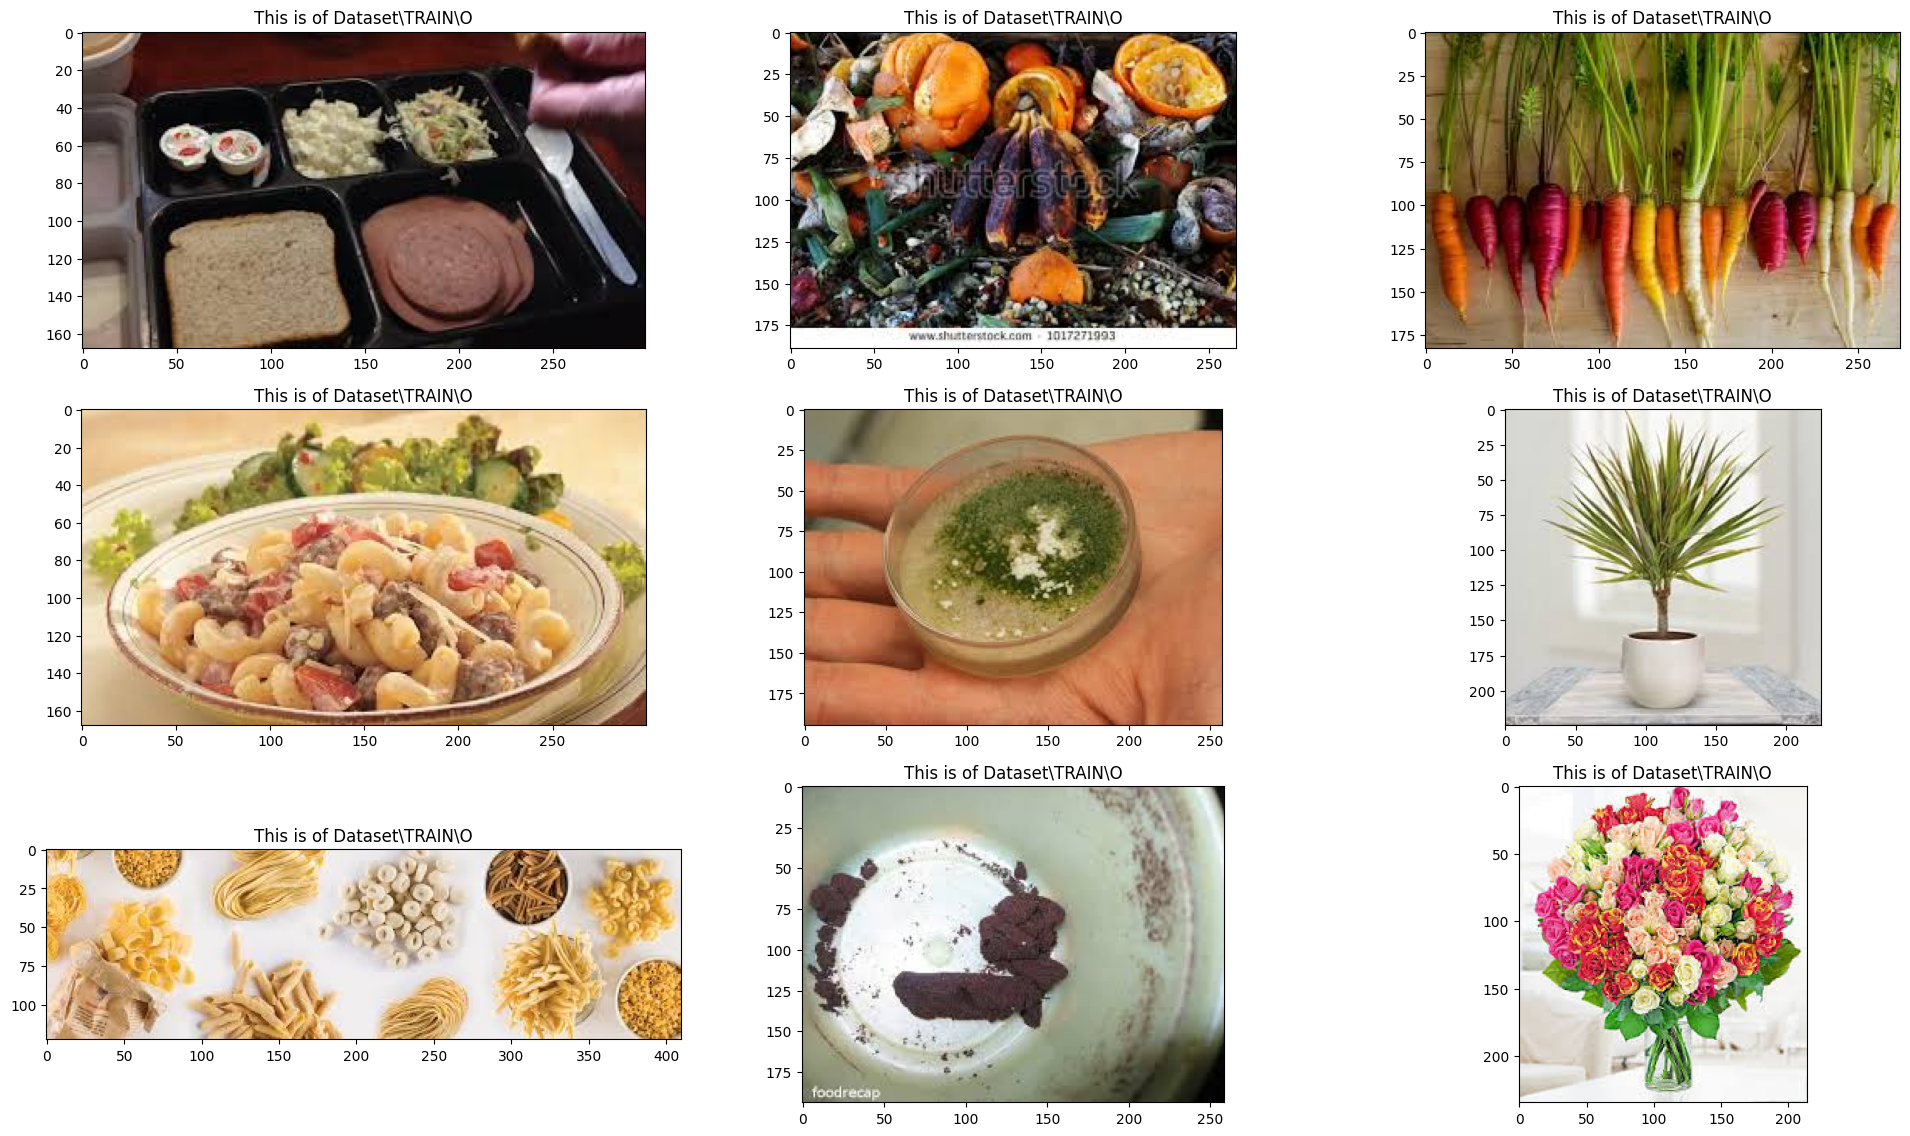

In [9]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [14]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1521s 17s/step - accuracy: 0.7198 - loss: 0.6068 - val_accuracy: 0.8735 - val_loss: 0.3443
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 804s 9s/step - accuracy: 0.8246 - loss: 0.4252 - val_accuracy: 0.8834 - val_loss: 0.3037
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 821s 9s/step - accuracy: 0.8499 - loss: 0.3743 - val_accuracy: 0.8802 - val_loss: 0.3154
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 748s 8s/step - accuracy: 0.8550 - loss: 0.3627 - val_accuracy: 0.8750 - val_loss: 0.3049
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2249s 25s/step - accuracy: 0.8714 - loss: 0.3268 - val_accuracy: 0.8949 - val_loss: 0.2848
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 790s 9s/step - accuracy: 0.8823 - loss: 0.3026 - val_accuracy: 0.8870 - val_loss: 0.2916
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 746s 8s/step - accuracy: 0.8943 - loss: 0.2778 - val_accuracy: 0.8922 - val_loss: 0.2861
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 792s 9s/step - accuracy: 0.9149 - loss: 0.2246 - val_accuracy: 0.8934

In [16]:
model.save('waste_classification_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [17]:
from tensorflow.keras.models import load_model

loaded_model = load_model('waste_classification_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [18]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9066 - loss: 0.2998
Test Accuracy: 0.90


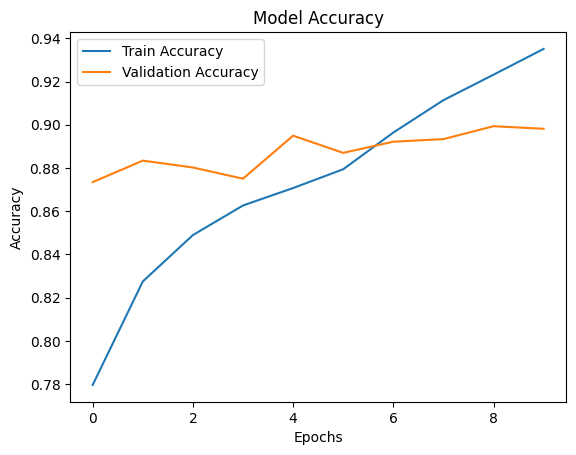

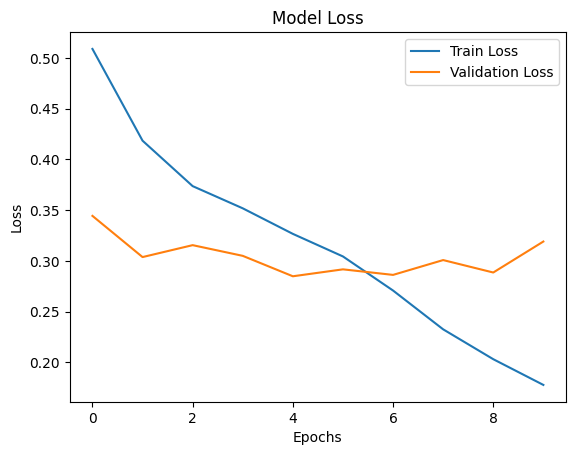

In [19]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
